In [1]:
import torch
import numpy as np
from sandbox import SimpleModel, toy_data
import copy
import matplotlib.pyplot as plt

## Simple Model

In [2]:
# keep same initialization
original_model = SimpleModel(1, 1, 4, 6, 6)

loss: 0.15576224029064178 - size: 77


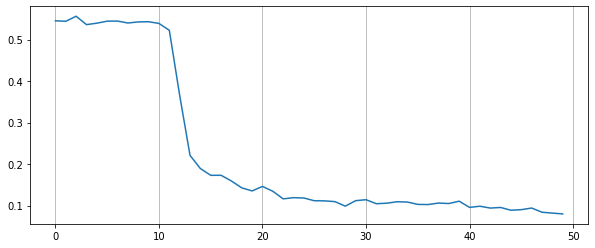

In [3]:
model = original_model
optim = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()
losses = list()

num_batches = 200

for epoch in range(50):
    loss_sum = 0
    for batch in range(num_batches):
        train_x, train_y = toy_data()
        optim.zero_grad()
        y = model(train_x)
        loss = criterion(y, train_y)
        loss_sum += loss.data
        loss.backward()
        optim.step()
        
    losses.append(loss_sum / num_batches)


print(f"loss: {loss.data} - size: {sum(p.numel() for p in model.parameters())}")

plt.subplots(figsize=(10, 4))
plt.plot(losses)
plt.gca().xaxis.grid(True)
plt.show()

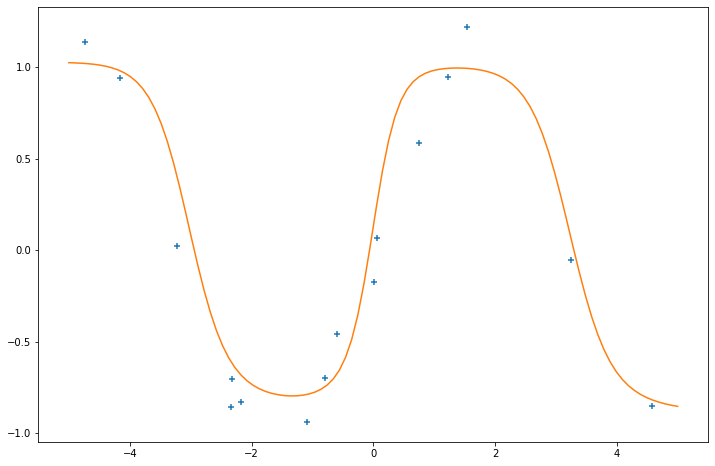

In [4]:
plt.subplots(figsize=(12, 8))

model.eval()

train_x, train_y = toy_data()

x = torch.linspace(-5, 5, 100)[:, None]



y = model(x).detach().numpy()
x = x.detach().numpy()
plt.plot(x, y, c='tab:orange')

plt.scatter(train_x.detach(), train_y.detach(), marker='+')
#plt.legend()
plt.show()

# Growing the model

## Influence of neuron split noise

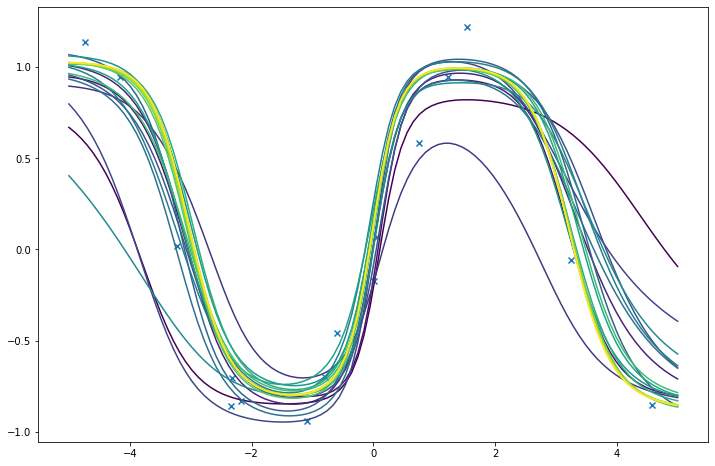

In [5]:
cmap = plt.get_cmap("viridis")
plt.subplots(figsize=(12, 8))

vmax = .5

for eps in np.linspace(0, vmax, 20)[::-1]:
    x = torch.linspace(-5, 5, 100)[:, None]
    
    model = copy.deepcopy(original_model)
    if eps is not None:
        model.grow(num_novel=4, eps_novel=0, eps_split=eps)
        
    y = model(x).detach().numpy()
    x = x.detach().numpy()
    plt.plot(x, y, label=eps, c=cmap(1-eps/vmax))

plt.scatter(train_x.detach(), train_y.detach(), marker='x')
#plt.legend()
plt.show()

## Influence of new neuron (with different inits)

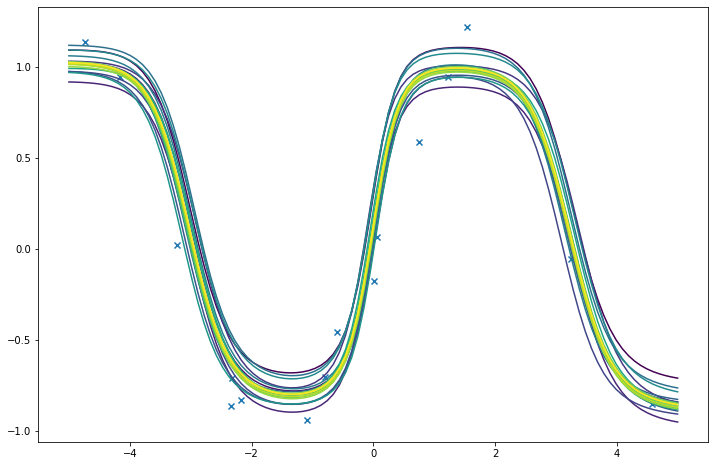

In [6]:
plt.subplots(figsize=(12, 8))

for eps in np.linspace(0, vmax, 20)[::-1]:
    x = torch.linspace(-5, 5, 100)[:, None]
    
    model = copy.deepcopy(original_model)
    if eps is not None:
        model.grow(num_novel=4, eps_novel=eps, eps_split=0)
        
    y = model(x).detach().numpy()
    x = x.detach().numpy()
    plt.plot(x, y, label=eps, c=cmap(1-eps/vmax))

plt.scatter(train_x.detach(), train_y.detach(), marker='x')
#plt.legend()
plt.show()